# Código de apoyo principal para el proyecto estadístico: Análisis de datos a empresa turistica

- Grupo: Diego Astaburuaga y David Rivas
- Objetivo: Utilizar los datos brindados por la empresa para obtener información de valor para el negocio, exponiendo gráficos, análisis y manejo de los datos de manera clara y comprensible.

> Ideas:
> - Cointegración de las ventas según el canal.
> - Análisis de Causalidad según covariables.
> - Medidas de influencia?
> - Regresión logística para ver la influencia de los parámetros... <- Modelo de machine learning para levantar.
> -

In [114]:
import pandas as pd
import matplotlib.pyplot as plt


from os import getcwd

### Importar el dataframe original

In [115]:
archivo = 'c:\\Users\\diego\\OneDrive - Universidad Técnica Federico Santa María\\(01)-University\\(10)_X_Semestre\\(05)-ProyectosEstadisticos\\CarpetaVSCode\\datos.xlsx'
original_data = pd.read_excel(archivo, sheet_name='Datos', nrows=381)

original_data

,Mes,Nombre Completo,Teléfono,Asset Code,Fecha Entrada,Fecha Salida,N° Noches,N° Pasajeros,Mascota,Canal de Venta,...,Precio USD,Precio CLP,Precio [$CLP] IVA Inc,Tax Booking,Clean Up,IVA 19%,Precio [$CLP] Neto,Año,Medio de Pago,Boleta/Factura
0,Enero,Patricio Morales,9.575026e+08,C1,2022-01-02,2022-01-03,1,5.0,No,Venta Directa,...,NaN,70000.0,70000.0,0.000000,25000,11176.470588,58823.529412,2022,TEF,BOL
1,Enero,Javier Kopplin,9.444791e+08,C1,2022-01-04,2022-01-05,1,5.0,No,Airbnb,...,NaN,75000.0,75000.0,2677.500000,25000,11974.789916,63025.210084,2022,TEF,BOL
2,Enero,Javier Kopplin,9.444791e+08,C1,2022-01-05,2022-01-06,1,5.0,No,Venta Directa,...,NaN,75000.0,75000.0,0.000000,25000,11974.789916,63025.210084,2022,TEF,BOL
3,Enero,Jean Pierre Lodis,9.910367e+08,C1,2022-01-06,2022-01-07,1,6.0,No,Booking,...,121.38,NaN,97104.0,13566.000000,25000,15504.000000,81600.000000,2022,TEF,BOL
4,Enero,Alejandra Arias,9.313381e+08,C1,2022-01-11,2022-01-12,1,5.0,No,Booking,...,115.31,NaN,92248.0,12887.588235,25000,14728.672269,77519.327731,2022,TEF,BOL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,Septiembre,Mark Johanson,9.982726e+08,C1,2024-09-13,2024-09-15,2,4.0,No,Booking,...,424.12,NaN,402914.0,47401.647059,0,64330.806723,338583.193277,2024,Transbank,BOL
377,Septiembre,Paula Carreño,9.620666e+08,C2,2024-09-14,2024-09-17,3,7.0,No,Venta Directa,...,NaN,450000.0,450000.0,0.000000,0,71848.739496,378151.260504,2024,Transbank,BOL
378,Septiembre,Chino,8.618223e+12,C2,2024-09-18,2024-09-19,1,4.0,No,Airbnb,...,NaN,330000.0,330000.0,11781.000000,0,52689.075630,277310.924370,2024,Transbank,BOL
379,Septiembre,Martina Hinrichsen,9.963744e+08,C1,2024-09-18,2024-09-22,4,6.0,No,Booking,...,975.47,NaN,926696.5,109023.117647,0,147959.945378,778736.554622,2024,Transbank,BOL


In [116]:
original_data.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Mes                    381 non-null    object        
 1   Nombre Completo        381 non-null    object        
 2   Teléfono               333 non-null    float64       
 3   Asset Code             381 non-null    object        
 4   Fecha Entrada          381 non-null    datetime64[ns]
 5   Fecha Salida           381 non-null    datetime64[ns]
 6   N° Noches              381 non-null    int64         
 7   N° Pasajeros           380 non-null    float64       
 8   Mascota                377 non-null    object        
 9   Canal de Venta         381 non-null    object        
 10  Precio x Noche         381 non-null    float64       
 11  Precio USD             179 non-null    object        
 12  Precio CLP             203 non-null    float64       
 13  Preci

### Crear dataframe a utilizar para trabajar

In [117]:
# eliminamos columnas con datos sensibles y otras que no se usaran
df = original_data.drop(columns=['Nombre Completo', 'Teléfono'])

# asigna 1 si paga en USD y 0 si paga en CLP
df['Pago en USD'] = df['Precio USD'].notna().astype(int)

df

,Mes,Asset Code,Fecha Entrada,Fecha Salida,N° Noches,N° Pasajeros,Mascota,Canal de Venta,Precio x Noche,Precio USD,Precio CLP,Precio [$CLP] IVA Inc,Tax Booking,Clean Up,IVA 19%,Precio [$CLP] Neto,Año,Medio de Pago,Boleta/Factura,Pago en USD
0,Enero,C1,2022-01-02,2022-01-03,1,5.0,No,Venta Directa,70000.000,NaN,70000.0,70000.0,0.000000,25000,11176.470588,58823.529412,2022,TEF,BOL,0
1,Enero,C1,2022-01-04,2022-01-05,1,5.0,No,Airbnb,75000.000,NaN,75000.0,75000.0,2677.500000,25000,11974.789916,63025.210084,2022,TEF,BOL,0
2,Enero,C1,2022-01-05,2022-01-06,1,5.0,No,Venta Directa,75000.000,NaN,75000.0,75000.0,0.000000,25000,11974.789916,63025.210084,2022,TEF,BOL,0
3,Enero,C1,2022-01-06,2022-01-07,1,6.0,No,Booking,97104.000,121.38,NaN,97104.0,13566.000000,25000,15504.000000,81600.000000,2022,TEF,BOL,1
4,Enero,C1,2022-01-11,2022-01-12,1,5.0,No,Booking,92248.000,115.31,NaN,92248.0,12887.588235,25000,14728.672269,77519.327731,2022,TEF,BOL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,Septiembre,C1,2024-09-13,2024-09-15,2,4.0,No,Booking,201457.000,424.12,NaN,402914.0,47401.647059,0,64330.806723,338583.193277,2024,Transbank,BOL,1
377,Septiembre,C2,2024-09-14,2024-09-17,3,7.0,No,Venta Directa,150000.000,NaN,450000.0,450000.0,0.000000,0,71848.739496,378151.260504,2024,Transbank,BOL,0
378,Septiembre,C2,2024-09-18,2024-09-19,1,4.0,No,Airbnb,330000.000,NaN,330000.0,330000.0,11781.000000,0,52689.075630,277310.924370,2024,Transbank,BOL,0
379,Septiembre,C1,2024-09-18,2024-09-22,4,6.0,No,Booking,231674.125,975.47,NaN,926696.5,109023.117647,0,147959.945378,778736.554622,2024,Transbank,BOL,1


eliminamos la columna de precio USD y CLP para simplificar el analisis, ya que de otra forma debemos incorporar el valor del dolar en el tiempo.

In [118]:
df.drop(columns=['Precio USD', 'Precio CLP'], inplace=True)

df

,Mes,Asset Code,Fecha Entrada,Fecha Salida,N° Noches,N° Pasajeros,Mascota,Canal de Venta,Precio x Noche,Precio [$CLP] IVA Inc,Tax Booking,Clean Up,IVA 19%,Precio [$CLP] Neto,Año,Medio de Pago,Boleta/Factura,Pago en USD
0,Enero,C1,2022-01-02,2022-01-03,1,5.0,No,Venta Directa,70000.000,70000.0,0.000000,25000,11176.470588,58823.529412,2022,TEF,BOL,0
1,Enero,C1,2022-01-04,2022-01-05,1,5.0,No,Airbnb,75000.000,75000.0,2677.500000,25000,11974.789916,63025.210084,2022,TEF,BOL,0
2,Enero,C1,2022-01-05,2022-01-06,1,5.0,No,Venta Directa,75000.000,75000.0,0.000000,25000,11974.789916,63025.210084,2022,TEF,BOL,0
3,Enero,C1,2022-01-06,2022-01-07,1,6.0,No,Booking,97104.000,97104.0,13566.000000,25000,15504.000000,81600.000000,2022,TEF,BOL,1
4,Enero,C1,2022-01-11,2022-01-12,1,5.0,No,Booking,92248.000,92248.0,12887.588235,25000,14728.672269,77519.327731,2022,TEF,BOL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,Septiembre,C1,2024-09-13,2024-09-15,2,4.0,No,Booking,201457.000,402914.0,47401.647059,0,64330.806723,338583.193277,2024,Transbank,BOL,1
377,Septiembre,C2,2024-09-14,2024-09-17,3,7.0,No,Venta Directa,150000.000,450000.0,0.000000,0,71848.739496,378151.260504,2024,Transbank,BOL,0
378,Septiembre,C2,2024-09-18,2024-09-19,1,4.0,No,Airbnb,330000.000,330000.0,11781.000000,0,52689.075630,277310.924370,2024,Transbank,BOL,0
379,Septiembre,C1,2024-09-18,2024-09-22,4,6.0,No,Booking,231674.125,926696.5,109023.117647,0,147959.945378,778736.554622,2024,Transbank,BOL,1


In [119]:
df[df.isna().any(axis=1)]

,Mes,Asset Code,Fecha Entrada,Fecha Salida,N° Noches,N° Pasajeros,Mascota,Canal de Venta,Precio x Noche,Precio [$CLP] IVA Inc,Tax Booking,Clean Up,IVA 19%,Precio [$CLP] Neto,Año,Medio de Pago,Boleta/Factura,Pago en USD
31,Febrero,C1,2022-02-25,2022-02-27,2,6.0,NaN,Venta Directa,85000.0,170000.0,0.0,25000,27142.857143,142857.142857,2022,TEF,BOL,0
32,Febrero,C1,2022-02-27,2022-03-01,2,6.0,NaN,Booking,97104.0,194208.0,27132.0,25000,31008.000000,163200.000000,2022,TEF,BOL,1
267,Febrero,C1,2024-02-24,2024-02-25,1,NaN,NaN,Venta Directa,80000.0,80000.0,0.0,0,12773.109244,67226.890756,2024,TEF,BOL,0
357,Julio,C2,2024-07-22,2024-07-23,1,9.0,NaN,Venta Directa,212000.0,212000.0,0.0,0,33848.739496,178151.260504,2024,Transbank,BOL,0


de momento por simpleza, eliminamos estas pocas observaciones...

In [120]:
df.dropna(inplace=True)

df

,Mes,Asset Code,Fecha Entrada,Fecha Salida,N° Noches,N° Pasajeros,Mascota,Canal de Venta,Precio x Noche,Precio [$CLP] IVA Inc,Tax Booking,Clean Up,IVA 19%,Precio [$CLP] Neto,Año,Medio de Pago,Boleta/Factura,Pago en USD
0,Enero,C1,2022-01-02,2022-01-03,1,5.0,No,Venta Directa,70000.000,70000.0,0.000000,25000,11176.470588,58823.529412,2022,TEF,BOL,0
1,Enero,C1,2022-01-04,2022-01-05,1,5.0,No,Airbnb,75000.000,75000.0,2677.500000,25000,11974.789916,63025.210084,2022,TEF,BOL,0
2,Enero,C1,2022-01-05,2022-01-06,1,5.0,No,Venta Directa,75000.000,75000.0,0.000000,25000,11974.789916,63025.210084,2022,TEF,BOL,0
3,Enero,C1,2022-01-06,2022-01-07,1,6.0,No,Booking,97104.000,97104.0,13566.000000,25000,15504.000000,81600.000000,2022,TEF,BOL,1
4,Enero,C1,2022-01-11,2022-01-12,1,5.0,No,Booking,92248.000,92248.0,12887.588235,25000,14728.672269,77519.327731,2022,TEF,BOL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,Septiembre,C1,2024-09-13,2024-09-15,2,4.0,No,Booking,201457.000,402914.0,47401.647059,0,64330.806723,338583.193277,2024,Transbank,BOL,1
377,Septiembre,C2,2024-09-14,2024-09-17,3,7.0,No,Venta Directa,150000.000,450000.0,0.000000,0,71848.739496,378151.260504,2024,Transbank,BOL,0
378,Septiembre,C2,2024-09-18,2024-09-19,1,4.0,No,Airbnb,330000.000,330000.0,11781.000000,0,52689.075630,277310.924370,2024,Transbank,BOL,0
379,Septiembre,C1,2024-09-18,2024-09-22,4,6.0,No,Booking,231674.125,926696.5,109023.117647,0,147959.945378,778736.554622,2024,Transbank,BOL,1


notemos que el número de pasajeros es un número entero...

In [121]:
df['N° Pasajeros'] = df['N° Pasajeros'].astype(int)

df

,Mes,Asset Code,Fecha Entrada,Fecha Salida,N° Noches,N° Pasajeros,Mascota,Canal de Venta,Precio x Noche,Precio [$CLP] IVA Inc,Tax Booking,Clean Up,IVA 19%,Precio [$CLP] Neto,Año,Medio de Pago,Boleta/Factura,Pago en USD
0,Enero,C1,2022-01-02,2022-01-03,1,5,No,Venta Directa,70000.000,70000.0,0.000000,25000,11176.470588,58823.529412,2022,TEF,BOL,0
1,Enero,C1,2022-01-04,2022-01-05,1,5,No,Airbnb,75000.000,75000.0,2677.500000,25000,11974.789916,63025.210084,2022,TEF,BOL,0
2,Enero,C1,2022-01-05,2022-01-06,1,5,No,Venta Directa,75000.000,75000.0,0.000000,25000,11974.789916,63025.210084,2022,TEF,BOL,0
3,Enero,C1,2022-01-06,2022-01-07,1,6,No,Booking,97104.000,97104.0,13566.000000,25000,15504.000000,81600.000000,2022,TEF,BOL,1
4,Enero,C1,2022-01-11,2022-01-12,1,5,No,Booking,92248.000,92248.0,12887.588235,25000,14728.672269,77519.327731,2022,TEF,BOL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,Septiembre,C1,2024-09-13,2024-09-15,2,4,No,Booking,201457.000,402914.0,47401.647059,0,64330.806723,338583.193277,2024,Transbank,BOL,1
377,Septiembre,C2,2024-09-14,2024-09-17,3,7,No,Venta Directa,150000.000,450000.0,0.000000,0,71848.739496,378151.260504,2024,Transbank,BOL,0
378,Septiembre,C2,2024-09-18,2024-09-19,1,4,No,Airbnb,330000.000,330000.0,11781.000000,0,52689.075630,277310.924370,2024,Transbank,BOL,0
379,Septiembre,C1,2024-09-18,2024-09-22,4,6,No,Booking,231674.125,926696.5,109023.117647,0,147959.945378,778736.554622,2024,Transbank,BOL,1


duplicidad en la respuesta

In [122]:
df['Mascota'] = df['Mascota'].apply(lambda x: 0 if x == "No" else 1).astype(int)

eliminaremos las fechas exactas para centrar el análisis en valores mensuales y equiespacios en el tiempo

In [123]:
df.drop(columns=['Fecha Entrada', 'Fecha Salida'], inplace=True)

In [113]:
df

,Mes,Asset Code,N° Noches,N° Pasajeros,Mascota,Canal de Venta,Precio x Noche,Precio [$CLP] IVA Inc,Tax Booking,Clean Up,IVA 19%,Precio [$CLP] Neto,Año,Medio de Pago,Boleta/Factura,Pago en USD
0,Enero,C1,1,5,1,Venta Directa,70000.000,70000.0,0.000000,25000,11176.470588,58823.529412,2022,TEF,BOL,0
1,Enero,C1,1,5,1,Airbnb,75000.000,75000.0,2677.500000,25000,11974.789916,63025.210084,2022,TEF,BOL,0
2,Enero,C1,1,5,1,Venta Directa,75000.000,75000.0,0.000000,25000,11974.789916,63025.210084,2022,TEF,BOL,0
3,Enero,C1,1,6,1,Booking,97104.000,97104.0,13566.000000,25000,15504.000000,81600.000000,2022,TEF,BOL,1
4,Enero,C1,1,5,1,Booking,92248.000,92248.0,12887.588235,25000,14728.672269,77519.327731,2022,TEF,BOL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,Septiembre,C1,2,4,1,Booking,201457.000,402914.0,47401.647059,0,64330.806723,338583.193277,2024,Transbank,BOL,1
377,Septiembre,C2,3,7,1,Venta Directa,150000.000,450000.0,0.000000,0,71848.739496,378151.260504,2024,Transbank,BOL,0
378,Septiembre,C2,1,4,1,Airbnb,330000.000,330000.0,11781.000000,0,52689.075630,277310.924370,2024,Transbank,BOL,0
379,Septiembre,C1,4,6,1,Booking,231674.125,926696.5,109023.117647,0,147959.945378,778736.554622,2024,Transbank,BOL,1


In [124]:
df_non_float = df.select_dtypes(exclude=['float', 'datetime64[ns]'])

unique_values = {col: df_non_float[col].unique() for col in df_non_float.columns}

unique_values

{'Mes': array(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',
        'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
       dtype=object),
 'Asset Code': array(['C1', 'C2'], dtype=object),
 'N° Noches': array([1, 3, 2, 4, 5, 6], dtype=int64),
 'N° Pasajeros': array([5, 6, 7, 2, 4, 1, 8, 3, 9]),
 'Mascota': array([0, 1]),
 'Canal de Venta': array(['Venta Directa', 'Airbnb', 'Booking'], dtype=object),
 'Clean Up': array([25000,     0], dtype=int64),
 'Año': array([2022, 2023, 2024], dtype=int64),
 'Medio de Pago': array(['TEF', 'Transbank', 'Efectivo'], dtype=object),
 'Boleta/Factura': array(['BOL', 'FAC'], dtype=object),
 'Pago en USD': array([0, 1])}

In [7]:
df_Booking = df_short[df_short['Canal de Venta'] == 'Booking']
df_Venta = df_short[df_short['Canal de Venta'] == 'Venta Directa']
df_Airbnb = df_short[df_short['Canal de Venta'] == 'Airbnb']

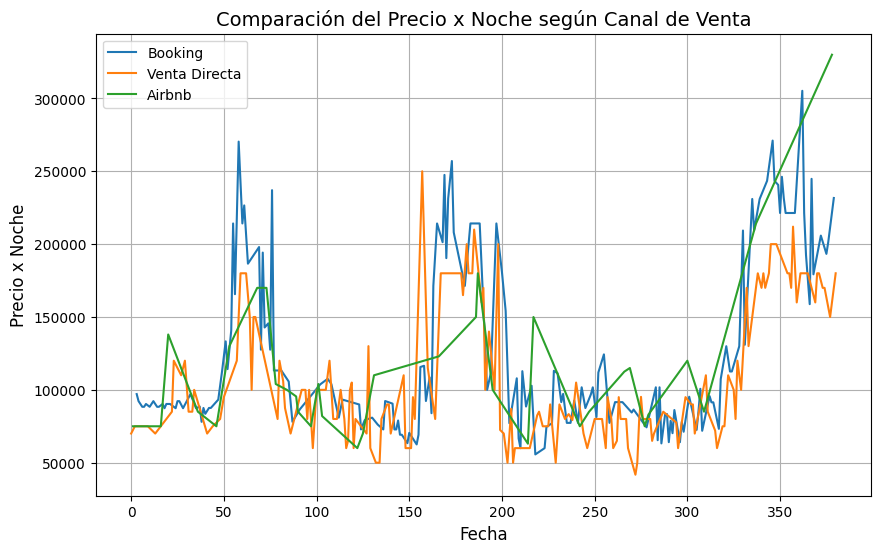

In [8]:
# Crear una figura más grande
plt.figure(figsize=(10, 6))

# Graficar los tres conjuntos de datos
df_Booking['Precio x Noche'].plot(label='Booking')
df_Venta['Precio x Noche'].plot(label='Venta Directa')
df_Airbnb['Precio x Noche'].plot(label='Airbnb')

# Añadir etiquetas a los ejes
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio x Noche', fontsize=12)

# Añadir título al gráfico
plt.title('Comparación del Precio x Noche según Canal de Venta', fontsize=14)

# Añadir una cuadrícula
plt.grid(True)

# Añadir una leyenda para identificar cada línea
plt.legend()

# Mostrar el gráfico
plt.show()

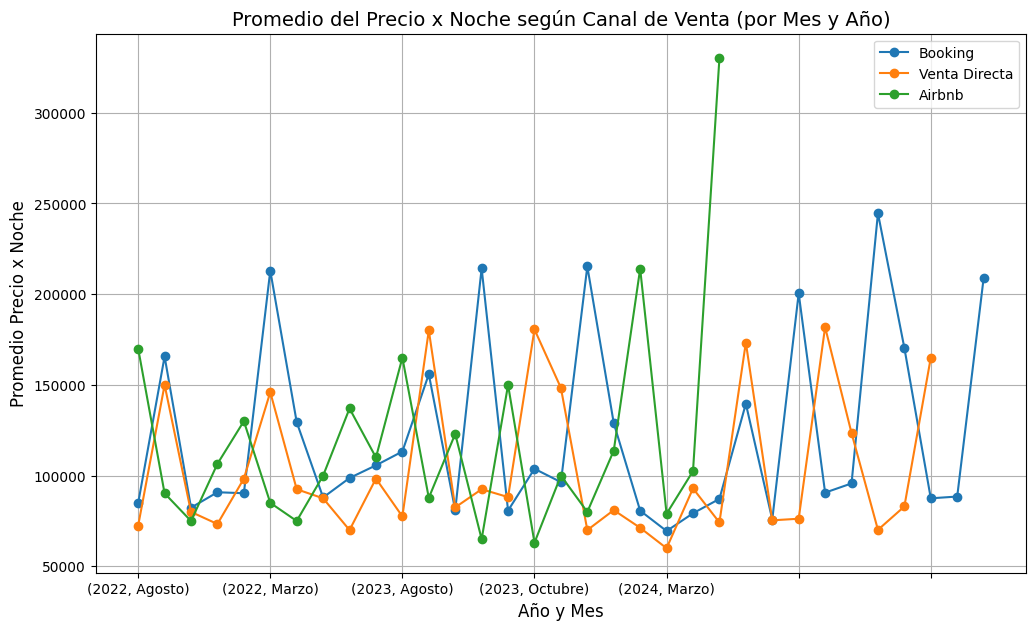

In [9]:
import matplotlib.pyplot as plt

# Agrupar por 'Mes' y 'Año' y calcular el promedio de 'Precio x Noche'
df_Booking_grouped = df_Booking.groupby(['Año', 'Mes'])['Precio x Noche'].mean()
df_Venta_grouped = df_Venta.groupby(['Año', 'Mes'])['Precio x Noche'].mean()
df_Airbnb_grouped = df_Airbnb.groupby(['Año', 'Mes'])['Precio x Noche'].mean()

# Crear una figura más grande
plt.figure(figsize=(12, 7))

# Graficar los valores agrupados
df_Booking_grouped.plot(label='Booking', marker='o')
df_Venta_grouped.plot(label='Venta Directa', marker='o')
df_Airbnb_grouped.plot(label='Airbnb', marker='o')

# Añadir etiquetas a los ejes
plt.xlabel('Año y Mes', fontsize=12)
plt.ylabel('Promedio Precio x Noche', fontsize=12)

# Añadir título al gráfico
plt.title('Promedio del Precio x Noche según Canal de Venta (por Mes y Año)', fontsize=14)

# Añadir una cuadrícula
plt.grid(True)

# Añadir una leyenda para identificar cada línea
plt.legend()

# Mostrar el gráfico
plt.show()

In [10]:
df_Airbnb_grouped

Año   Mes       
2022  Agosto        170000.0
      Diciembre      90242.0
      Enero          75000.0
      Febrero       106500.0
      Junio         130000.0
      Marzo          85000.0
      Mayo           75000.0
      Noviembre     100000.0
      Septiembre    137000.0
2023  Abril         110000.0
      Agosto        165000.0
      Enero          87750.0
      Junio         123000.0
      Marzo          65000.0
      Noviembre     150000.0
      Octubre        63050.0
      Septiembre    100000.0
2024  Enero          80000.0
      Febrero       113750.0
      Junio         214000.0
      Marzo          79000.0
      Mayo          102500.0
      Septiembre    330000.0
Name: Precio x Noche, dtype: float64

In [11]:
df_Booking.groupby(by=)

SyntaxError: invalid syntax (3224689725.py, line 1)

In [18]:
precio_neto = df['Precio [$CLP] Neto']

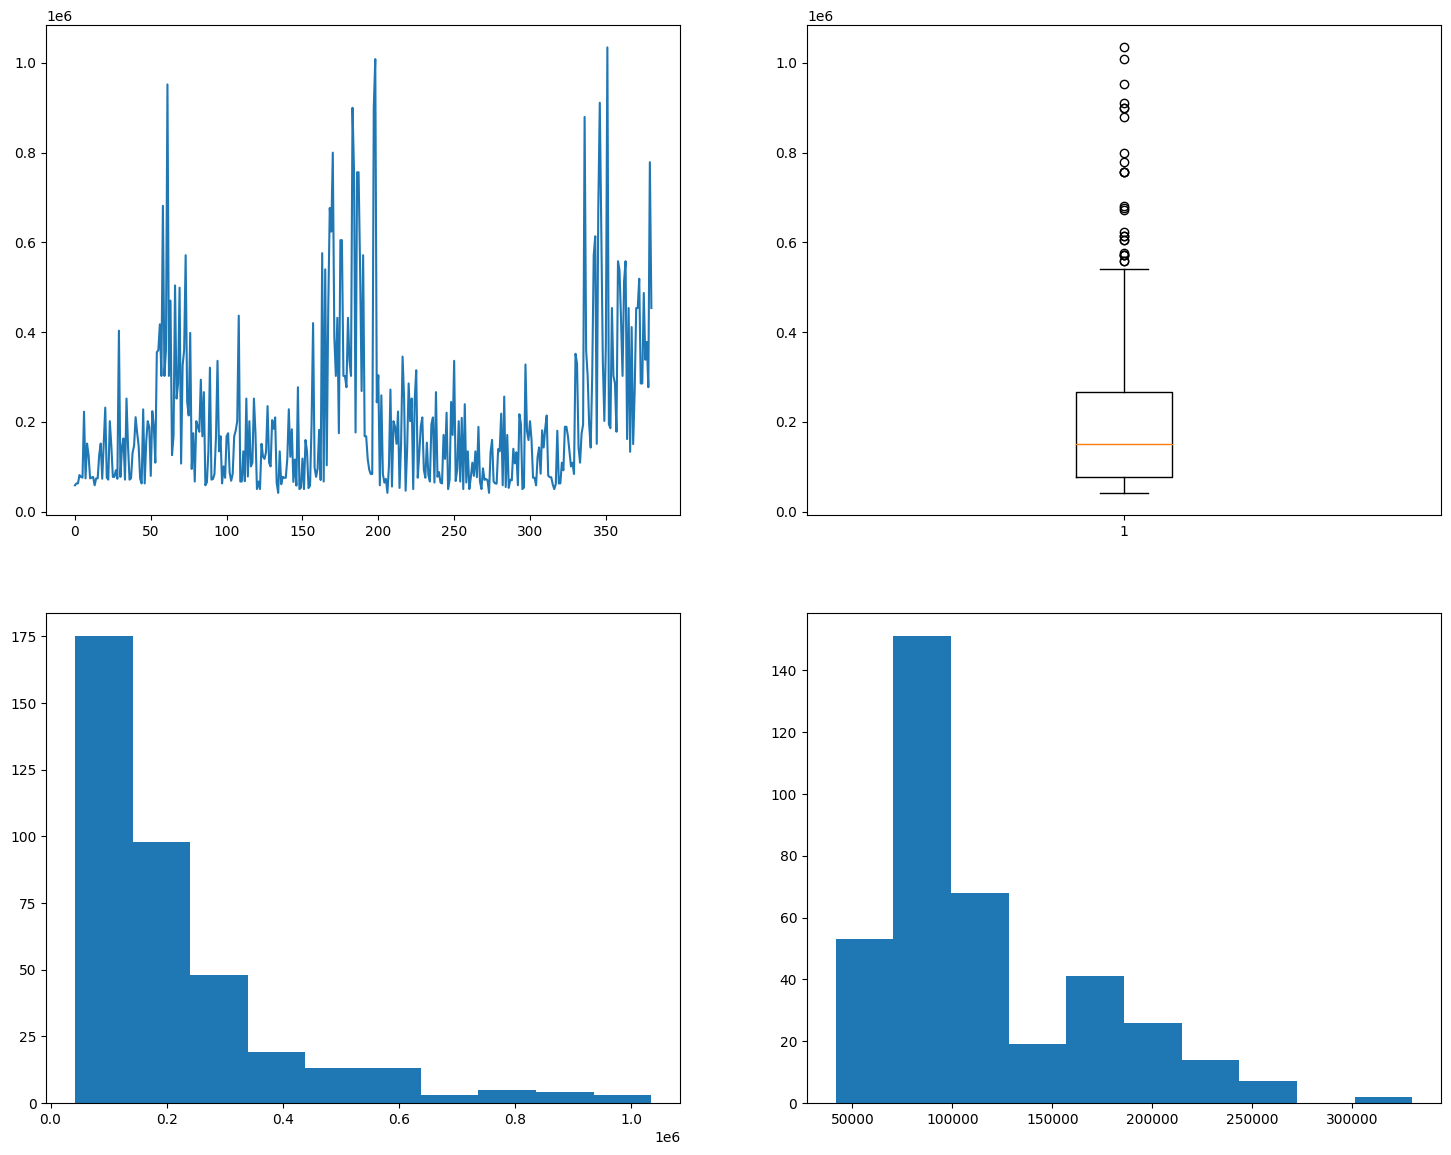

In [19]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(18, 14))

axs[0,0].plot(precio_neto)
axs[1,0].hist(precio_neto)
axs[0,1].boxplot(precio_neto)
axs[1,1].hist(df['Precio x Noche'])
plt.show()